In [6]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from gensim. corpora import Dictionary
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from gensim.models import Phrases
import re
from datetime import datetime
from postGetter import collegeDct

In [16]:
#reads ethnicity spread csv
df = pd.read_csv("ethnicitySpreadPerCollege.csv")

#only saves columns relating to name of college, state located, percentages of racial percentages, and year the data was taken
columns = ['INSTNM','STABBR', 'UGDS_WHITE', 'UGDS_hispanic','UGDS_HISP', 'UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI', 'UGDS_2MOR', 'year']
rdf = df[columns]
rdf = rdf.dropna(how='any')
rdf = rdf.loc[~(rdf[columns[2:8]]==0).all(axis=1)] #if every column for racial percentage equals 0 then it is dropped 
display(rdf)
"""
INSTNM = College/University Name
STABBR = State
UGDS_WHITE = White population
UGDS_hispanic = hispanic population
UGDS_HISP = Hispanic population
UGDS_ASIAN = Asian population
UGDS_AIAN = American Indian/Alaskan population
UGDS_NHPI = Hawaiin/Pacific Islander population
UGDS_2MOR = Multiethnic population
year = Year data was taken
"""

C:\Users\atori\AppData\Local\Temp\ipykernel_5972\749889844.py:2: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ethnicitySpreadPerCollege.csv")


,INSTNM,STABBR,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,year
21123,Alabama State University,AL,0.0133,0.9776,0.0034,0.0002,0.0006,0.0000,0.0000,2008
21132,Jacksonville State University,AL,0.6276,0.2825,0.0104,0.0078,0.0057,0.0000,0.0000,2008
21135,Marion Military Institute,AL,0.6482,0.2186,0.0553,0.0302,0.0126,0.0000,0.0050,2008
21136,University of Mobile,AL,0.6449,0.2056,0.0119,0.0077,0.0281,0.0000,0.0007,2008
21141,University of South Alabama,AL,0.6612,0.1904,0.0224,0.0263,0.0080,0.0068,0.0020,2008
...,...,...,...,...,...,...,...,...,...,...
57952,Herzing University-Tampa,FL,0.2647,0.3824,0.2353,0.0147,0.0000,0.0000,0.0147,2022
57953,Abilene Christian University-Undergraduate Online,TX,0.3542,0.2361,0.3012,0.0096,0.0048,0.0024,0.0337,2022
57954,Great Northern University,WA,0.8400,0.0400,0.0000,0.0000,0.0000,0.0000,0.0400,2022
57955,Arizona College of Nursing-Salt Lake City,UT,0.6720,0.0591,0.1667,0.0161,0.0000,0.0215,0.0645,2022


'\nINSTNM = College/University Name\nSTABBR = State\nUGDS_WHITE = White population\nUGDS_BLACK = Black population\nUGDS_HISP = Hispanic population\nUGDS_ASIAN = Asian population\nUGDS_AIAN = American Indian/Alaskan population\nUGDS_NHPI = Hawaiin/Pacific Islander population\nUGDS_2MOR = Multiethnic population\n'

Mean amount of white students: 0.5666071939446422 . And std white students:  0.26429891363289226
Mean amount of black students: 0.14339893838801757 . And std black students:  0.18769526696542807
Mean amount of hispanic students: 0.12746561788383207 . And std hispanic students:  0.18438913214570707
Mean amount of hispanic students: 0.03883853555277591 . And std hispanic students:  0.06274284768670638
Mean amount of American Indian/Alaskan population students: 0.007830748260046826 . And std American Indian/Alaskan population students:  0.03574808439079268
Mean amount of Multiethnic population students: 0.026878337983899415 . And std Multiethnic population students:  0.02830470473050628


Text(0.5, 1.0, 'Occurences of Percentages of Multiethnic population Students at Colleges Across the US from 2008 - 2022')

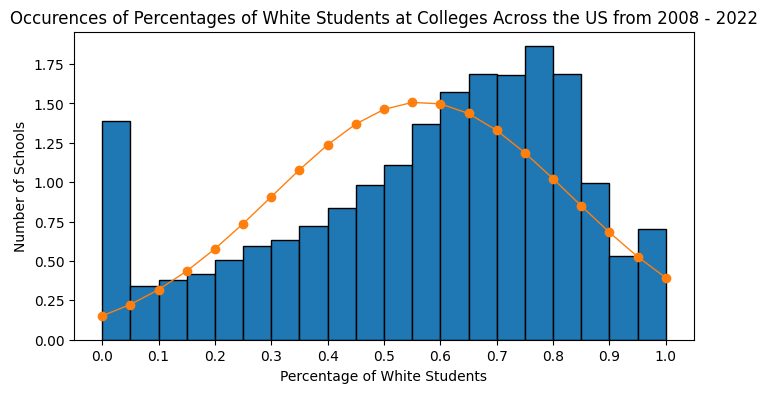

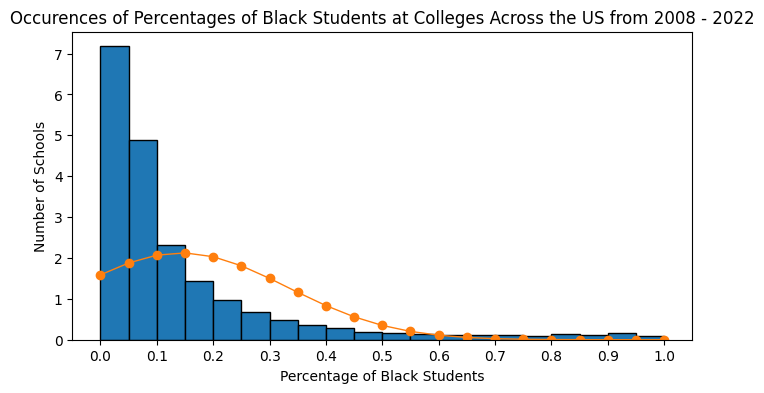

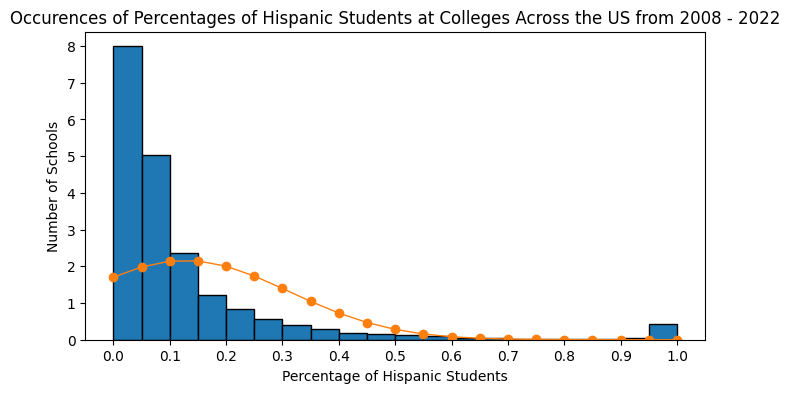

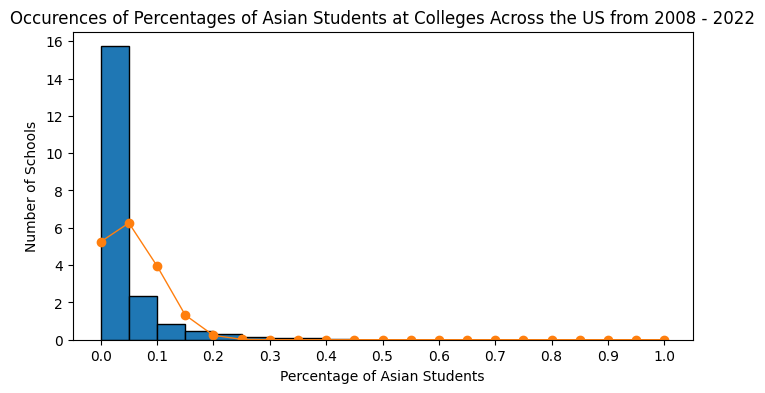

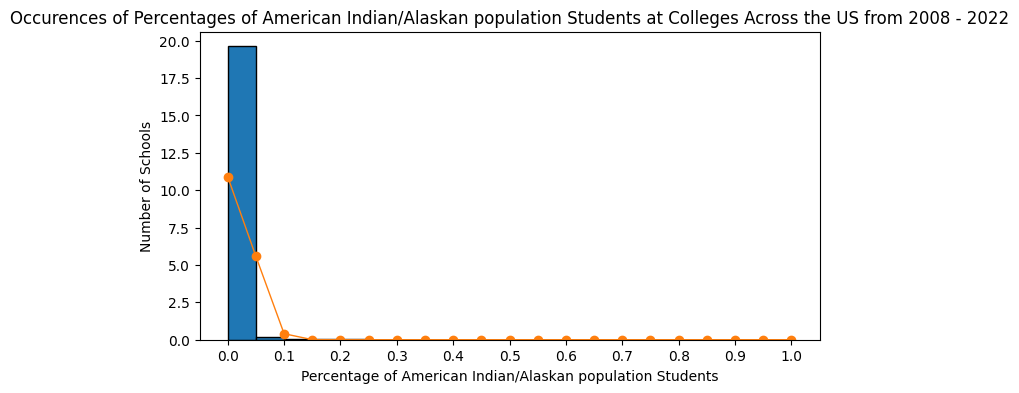

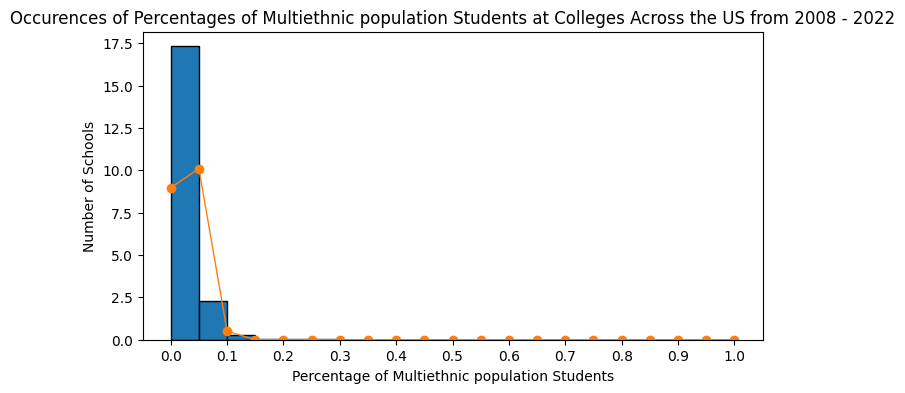

In [53]:
#creates graphs to show how often different percentages of races at colleges appear and gives a line that shows the normal distribution of the each value

#determines the size of the bins for the histogram to be from 0 to .8 in intervals of .05
size_bins = np.arange(0,1.01,.05)


#White Student Stats and Visualization
#mean and std
meanWhiteStudentSize = rdf['UGDS_WHITE'].mean()
stdWhiteStudentSize = rdf['UGDS_WHITE'].std(ddof=1)
print("Mean amount of white students:", meanWhiteStudentSize, ". And std white students: ", stdWhiteStudentSize)

#to create the line of normal distribution
ys = []
for b in size_bins:
    ys.append(norm.pdf(b, meanWhiteStudentSize, stdWhiteStudentSize))
xs = size_bins

#creates histogram and line of normal distributio
plt.figure(figsize=(8, 4))
plt.hist(rdf['UGDS_WHITE'], bins = size_bins, edgecolor='k', density=True)
plt.plot(xs, ys, linewidth=1, marker='o')
plt.xticks(size_bins[::2])
plt.xlabel('Percentage of White Students')
plt.ylabel('Number of Schools')
plt.title('Occurences of Percentages of White Students at Colleges Across the US from 2008 - 2022')


#Black Student Stats and Visualization
#mean and std
meanBlackStudentSize = rdf['UGDS_BLACK'].mean()
stdBlackStudentSize = rdf['UGDS_BLACK'].std(ddof=1)
print("Mean amount of black students:", meanBlackStudentSize, ". And std black students: ", stdBlackStudentSize)

#to create the line of normal distribution
ys = []
for b in size_bins:
    ys.append(norm.pdf(b, meanBlackStudentSize, stdBlackStudentSize))
xs = size_bins

#creates histogram and line of normal distributio
plt.figure(figsize=(8, 4))
plt.hist(rdf['UGDS_BLACK'], bins = size_bins, edgecolor='k', density=True)
plt.plot(xs, ys, linewidth=1, marker='o')
plt.xticks(size_bins[::2])
plt.xlabel('Percentage of Black Students')
plt.ylabel('Number of Schools')
plt.title('Occurences of Percentages of Black Students at Colleges Across the US from 2008 - 2022')


#hispanic Student Stats and Visualization
#mean and std
meanHispanicStudentSize = rdf['UGDS_HISP'].mean()
stdHIspanicStudentSize = rdf['UGDS_HISP'].std(ddof=1)
print("Mean amount of hispanic students:", meanHispanicStudentSize, ". And std hispanic students: ", stdHIspanicStudentSize)

#to create the line of normal distribution
ys = []
for b in size_bins:
    ys.append(norm.pdf(b, meanHispanicStudentSize, stdHIspanicStudentSize))
xs = size_bins

#creates histogram and line of normal distribution
plt.figure(figsize=(8, 4))
plt.hist(rdf['UGDS_HISP'], bins = size_bins, edgecolor='k', density=True)
plt.plot(xs, ys, linewidth=1, marker='o')
plt.xticks(size_bins[::2])
plt.xlabel('Percentage of Hispanic Students')
plt.ylabel('Number of Schools')
plt.title('Occurences of Percentages of Hispanic Students at Colleges Across the US from 2008 - 2022')


#Asian Student Stats and Visualization
#mean and std
meanAsianStudentSize = rdf['UGDS_ASIAN'].mean()
stdAsianStudentSize = rdf['UGDS_ASIAN'].std(ddof=1)
print("Mean amount of hispanic students:", meanAsianStudentSize, ". And std hispanic students: ", stdAsianStudentSize)

#to create the line of normal distribution
ys = []
for b in size_bins:
    ys.append(norm.pdf(b, meanAsianStudentSize, stdAsianStudentSize))
xs = size_bins

#creates histogram and line of normal distribution
plt.figure(figsize=(8, 4))
plt.hist(rdf['UGDS_ASIAN'], bins = size_bins, edgecolor='k', density=True)
plt.plot(xs, ys, linewidth=1, marker='o')
plt.xticks(size_bins[::2])
plt.xlabel('Percentage of Asian Students')
plt.ylabel('Number of Schools')
plt.title('Occurences of Percentages of Asian Students at Colleges Across the US from 2008 - 2022')


#American Indian/Alaskan population Student Stats and Visualization
#mean and std
meanAmericanIndianStudentSize = rdf['UGDS_AIAN'].mean()
stdAmericanIndianStudentSize = rdf['UGDS_AIAN'].std(ddof=1)
print("Mean amount of American Indian/Alaskan population students:", meanAmericanIndianStudentSize, ". And std American Indian/Alaskan population students: ", stdAmericanIndianStudentSize)

#to create the line of normal distribution
ys = []
for b in size_bins:
    ys.append(norm.pdf(b, meanAmericanIndianStudentSize, stdAmericanIndianStudentSize))
xs = size_bins

#creates histogram and line of normal distribution
plt.figure(figsize=(8, 4))
plt.hist(rdf['UGDS_AIAN'], bins = size_bins, edgecolor='k', density=True)
plt.plot(xs, ys, linewidth=1, marker='o')
plt.xticks(size_bins[::2])
plt.xlabel('Percentage of American Indian/Alaskan population Students')
plt.ylabel('Number of Schools')
plt.title('Occurences of Percentages of American Indian/Alaskan population Students at Colleges Across the US from 2008 - 2022')


#Multiethnic population Student Stats and Visualization
#mean and std
meanMultiethnicStudentSize = rdf['UGDS_2MOR'].mean()
stdMultiethnicStudentSize = rdf['UGDS_2MOR'].std(ddof=1)
print("Mean amount of Multiethnic population students:", meanMultiethnicStudentSize, ". And std Multiethnic population students: ", stdMultiethnicStudentSize)

#to create the line of normal distribution
ys = []
for b in size_bins:
    ys.append(norm.pdf(b, meanMultiethnicStudentSize, stdMultiethnicStudentSize))
xs = size_bins

#creates histogram and line of normal distribution
plt.figure(figsize=(8, 4))
plt.hist(rdf['UGDS_2MOR'], bins = size_bins, edgecolor='k', density=True)
plt.plot(xs, ys, linewidth=1, marker='o')
plt.xticks(size_bins[::2])
plt.xlabel('Percentage of Multiethnic population Students')
plt.ylabel('Number of Schools')
plt.title('Occurences of Percentages of Multiethnic population Students at Colleges Across the US from 2008 - 2022')

In [22]:
#Finds the cosine similarity to the phrase "Only White People" across all posts in college.csv


#function that finds vector representation for each token
def get_vector(bow,dct):
    vector_len = len(dct.token2id)
    vector = np.zeros(vector_len)
    for tk in bow:
        vector[tk[0]] = tk[1]
    vector = vector/sum(vector)
    return vector

#finds the cosine similairty between two different sentences or phrases
def cosine_sim(a,b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))


#reads the csv created from the posts webscraped from the college subreddit
df = pd.read_csv("college.csv")
df['timestamp'] = df['created_utc'].apply(lambda epoch:datetime.fromtimestamp(epoch)) #converts created utc to datetime format
df = df.sort_values(by='created_utc') #sorts dataframe based on earliest posts first
df=df.reset_index(drop=True)

#converts text to tokens, bow, and finds vector representation and cosine similarity
df['text'] = df['text'].apply(str.lower)
#remove @s, #s, urls, and rt
df['tokens'] = df['text'].apply(lambda txt: re.sub(r'@\w+|#\w+|http.+|rt\s', '', txt))
#tokenizes the words
df['tokens'] = df['tokens'].apply(word_tokenize)

#find phrases that have been used 30 or more times
phraser = Phrases(df['tokens'], min_count=30, delimiter='_')
df['tokens'] = df['tokens'].apply(lambda tokens:phraser[tokens])

#gets rid of stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda tokens: [t for t in tokens if t not in stop_words])

#keeps words tokenized if they are longer than 3 letters
df['tokens'] = df['tokens'].apply(lambda tokens: [t for t in tokens if len(t) > 3])

#stems the token words
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda tokens: [stemmer.stem(tk) for tk in tokens])

#gensim dictionary and filters out words that appear less than twenty times
dct = Dictionary(df['tokens'])
dct.filter_extremes(no_below=20) 

#creates bow column from the dictionary and rows with three or more bow
df['bow'] = df['tokens'].apply(dct.doc2bow)
df = df.loc[df['bow'].apply(lambda bow: len(bow) >= 3)]

#creates vector representation for each index in the bag of words
df['vector'] = df['bow'].apply(lambda bow: get_vector(bow, dct))

df.to_csv('college.csv') #df  saved to csv


#searches for cosine similarity
search = 'Only white people.'#sentence that will be searched throughout for cosine similarity
#turns the phrases into bow which is searched with previous dictionary to find vector
search = word_tokenize(search)
stop_words = set(stopwords.words('english'))
search = [s for s in search if s not in stop_words]
search = [s for s in search if len(s) >= 3]
search = [stemmer.stem(s) for s in search]
bow = dct.doc2bow(search)
vector = get_vector(bow, dct)

#finds vector representation for words that weren't filtered out in cdf dataframe
df['vector'] = df['bow'].apply(lambda bow: get_vector(bow, dct))

#iterates through cdf and finds cosine similarity with the phrase and text from posts still left
for index,row in df.iterrows():
    df.at[index, 'cossim'] = cosine_sim(row['vector'], vector)
#sorts based on highest cossim values and gets rid of one with 0
cdf_result = df.sort_values(by='cossim', ascending=False)
cdf_result = cdf_result.loc[cdf_result['cossim']>0]

cdf_result = cdf_result[['text', 'cossim']]
cdf_result.to_csv("racialDisparityCossim.csv")